In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv


In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.20.3 scipy==1.7.1 pandas==1.3.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.10 pynndescent==0.5.6


In [4]:
S11 = sc.read_10x_mtx('S11/filtered_feature_bc_matrix/',cache=True)  
S12 = sc.read_10x_mtx('S12/filtered_feature_bc_matrix/',cache=True)
S13 = sc.read_10x_mtx('S13/filtered_feature_bc_matrix/',cache=True)
S14 = sc.read_10x_mtx('S14/filtered_feature_bc_matrix/',cache=True)


... reading from cache file cache/S11-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/S12-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/S13-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/S14-filtered_feature_bc_matrix-matrix.h5ad


In [5]:
S11.obs['type'] = 'S11'
S12.obs['type'] = 'S12'
S13.obs['type'] = 'S13'
S14.obs['type'] = 'S14'

In [6]:
S11.var_names_make_unique()
S12.var_names_make_unique()
S13.var_names_make_unique()
S14.var_names_make_unique()

normalizing counts per cell
    finished (0:00:00)


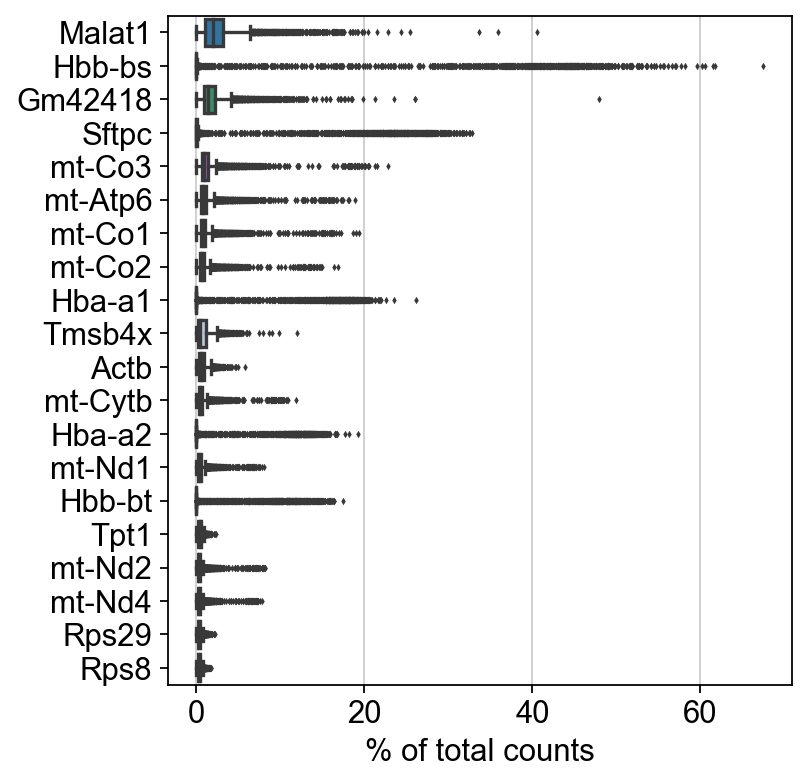

normalizing counts per cell
    finished (0:00:00)


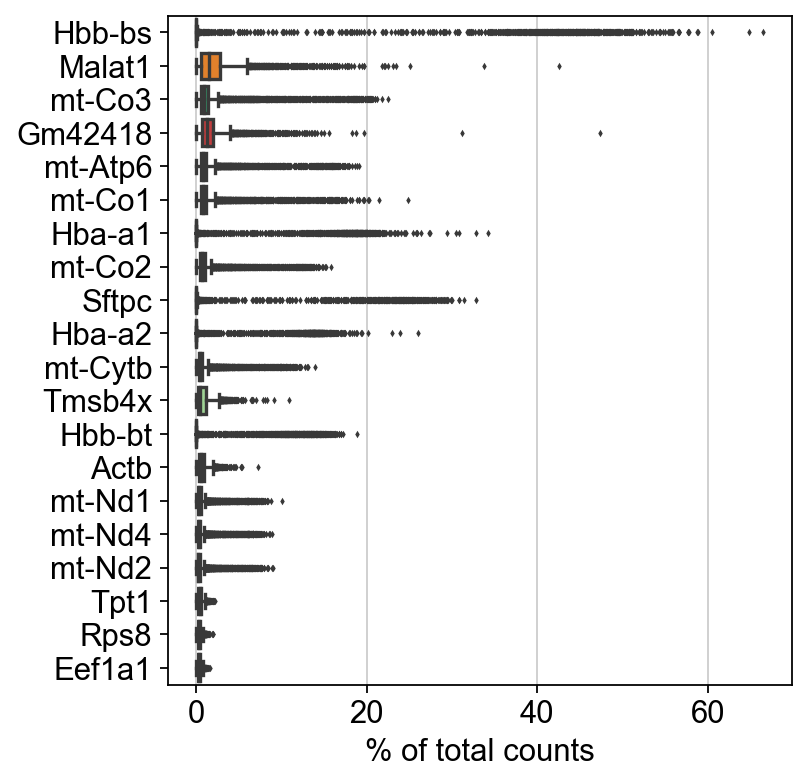

normalizing counts per cell
    finished (0:00:00)


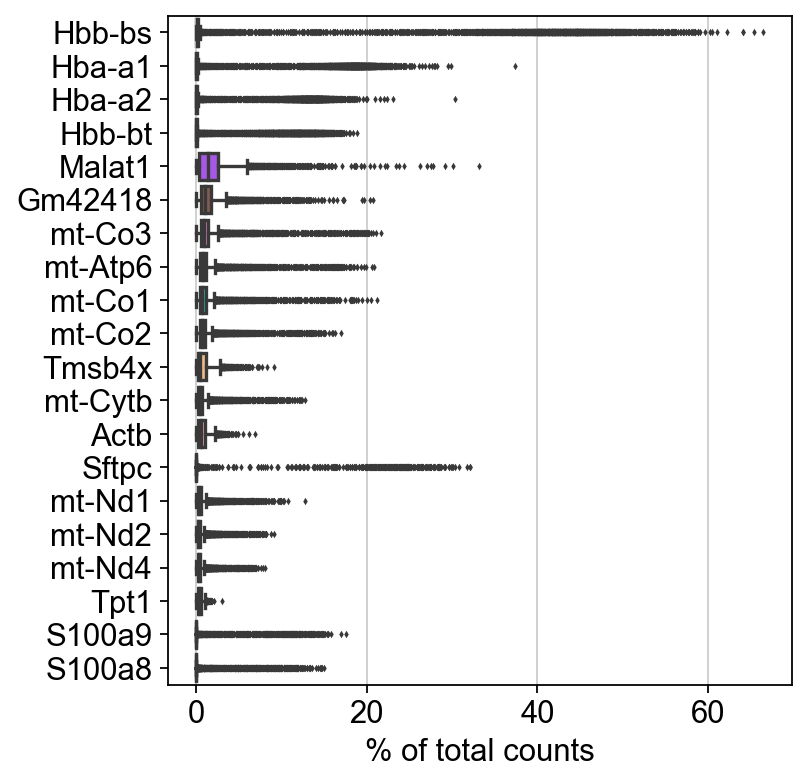

normalizing counts per cell
    finished (0:00:00)


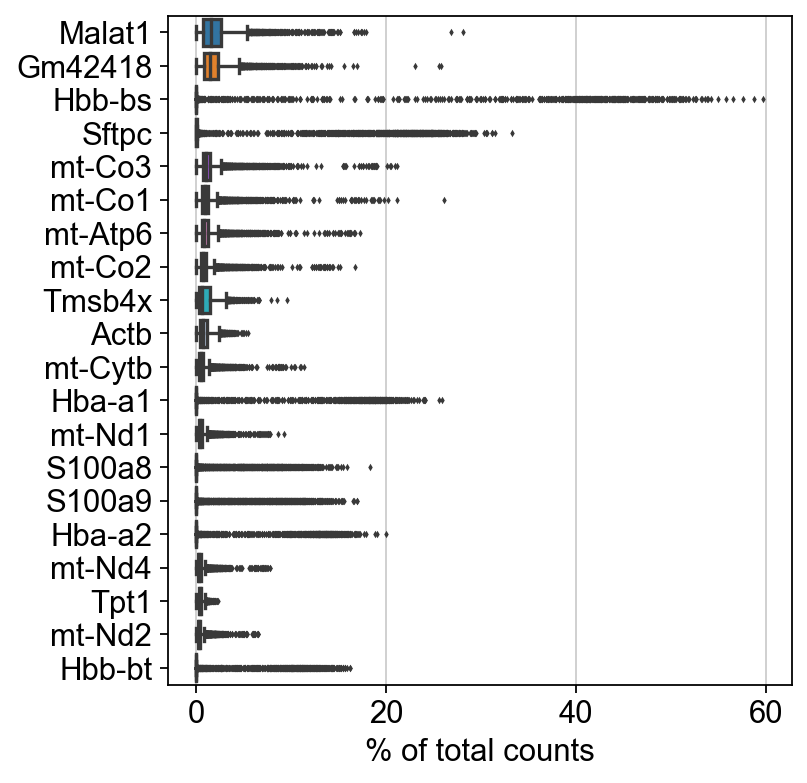

In [7]:
sc.pl.highest_expr_genes(S11, n_top=20, )
sc.pl.highest_expr_genes(S12, n_top=20, )
sc.pl.highest_expr_genes(S13, n_top=20, )
sc.pl.highest_expr_genes(S14, n_top=20, )




In [8]:
sc.pp.filter_cells(S11, min_genes=200)
sc.pp.filter_genes(S11, min_cells=3)
sc.pp.filter_cells(S12, min_genes=200)
sc.pp.filter_genes(S12, min_cells=3)
sc.pp.filter_cells(S13, min_genes=200)
sc.pp.filter_genes(S13, min_cells=3)
sc.pp.filter_cells(S14, min_genes=200)
sc.pp.filter_genes(S14, min_cells=3)

filtered out 378 cells that have less than 200 genes expressed
filtered out 12632 genes that are detected in less than 3 cells
filtered out 472 cells that have less than 200 genes expressed
filtered out 12874 genes that are detected in less than 3 cells
filtered out 1256 cells that have less than 200 genes expressed
filtered out 12967 genes that are detected in less than 3 cells
filtered out 361 cells that have less than 200 genes expressed
filtered out 12976 genes that are detected in less than 3 cells


In [9]:
S11.var['mt'] = S11.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(S11, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

S12.var['mt'] = S12.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(S12, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

S13.var['mt'] = S13.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(S13, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

S14.var['mt'] = S14.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(S14, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

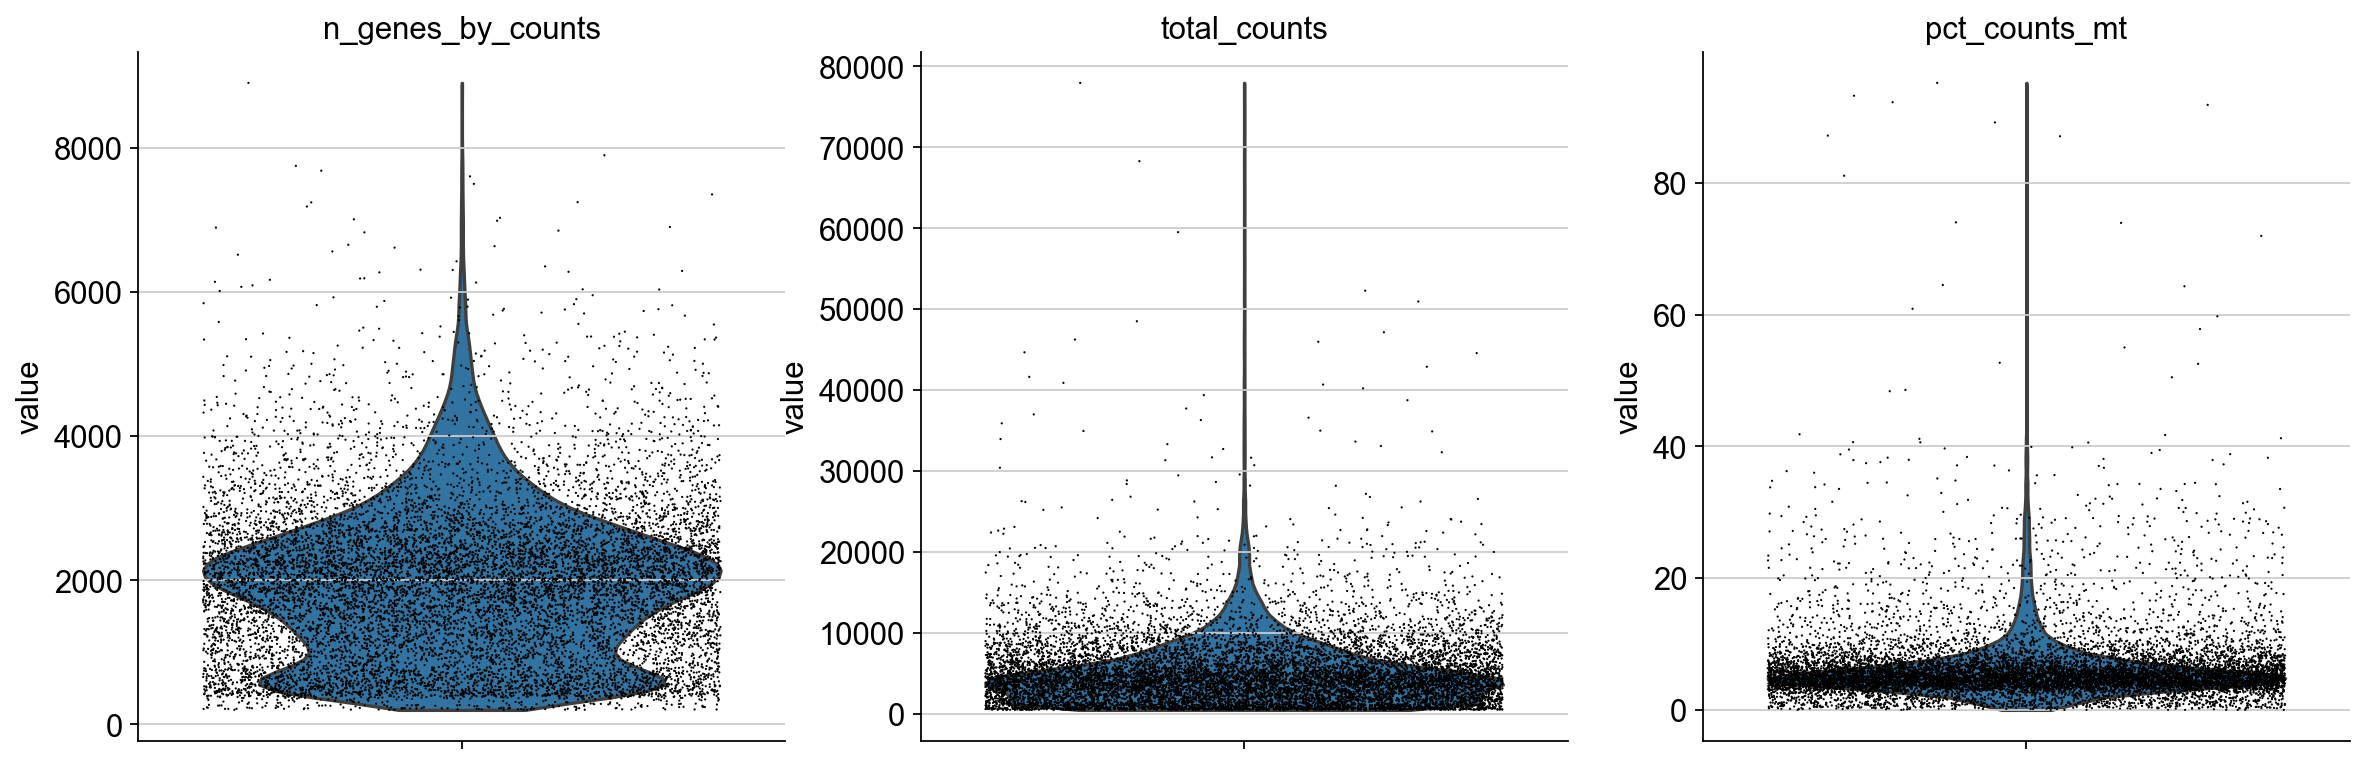

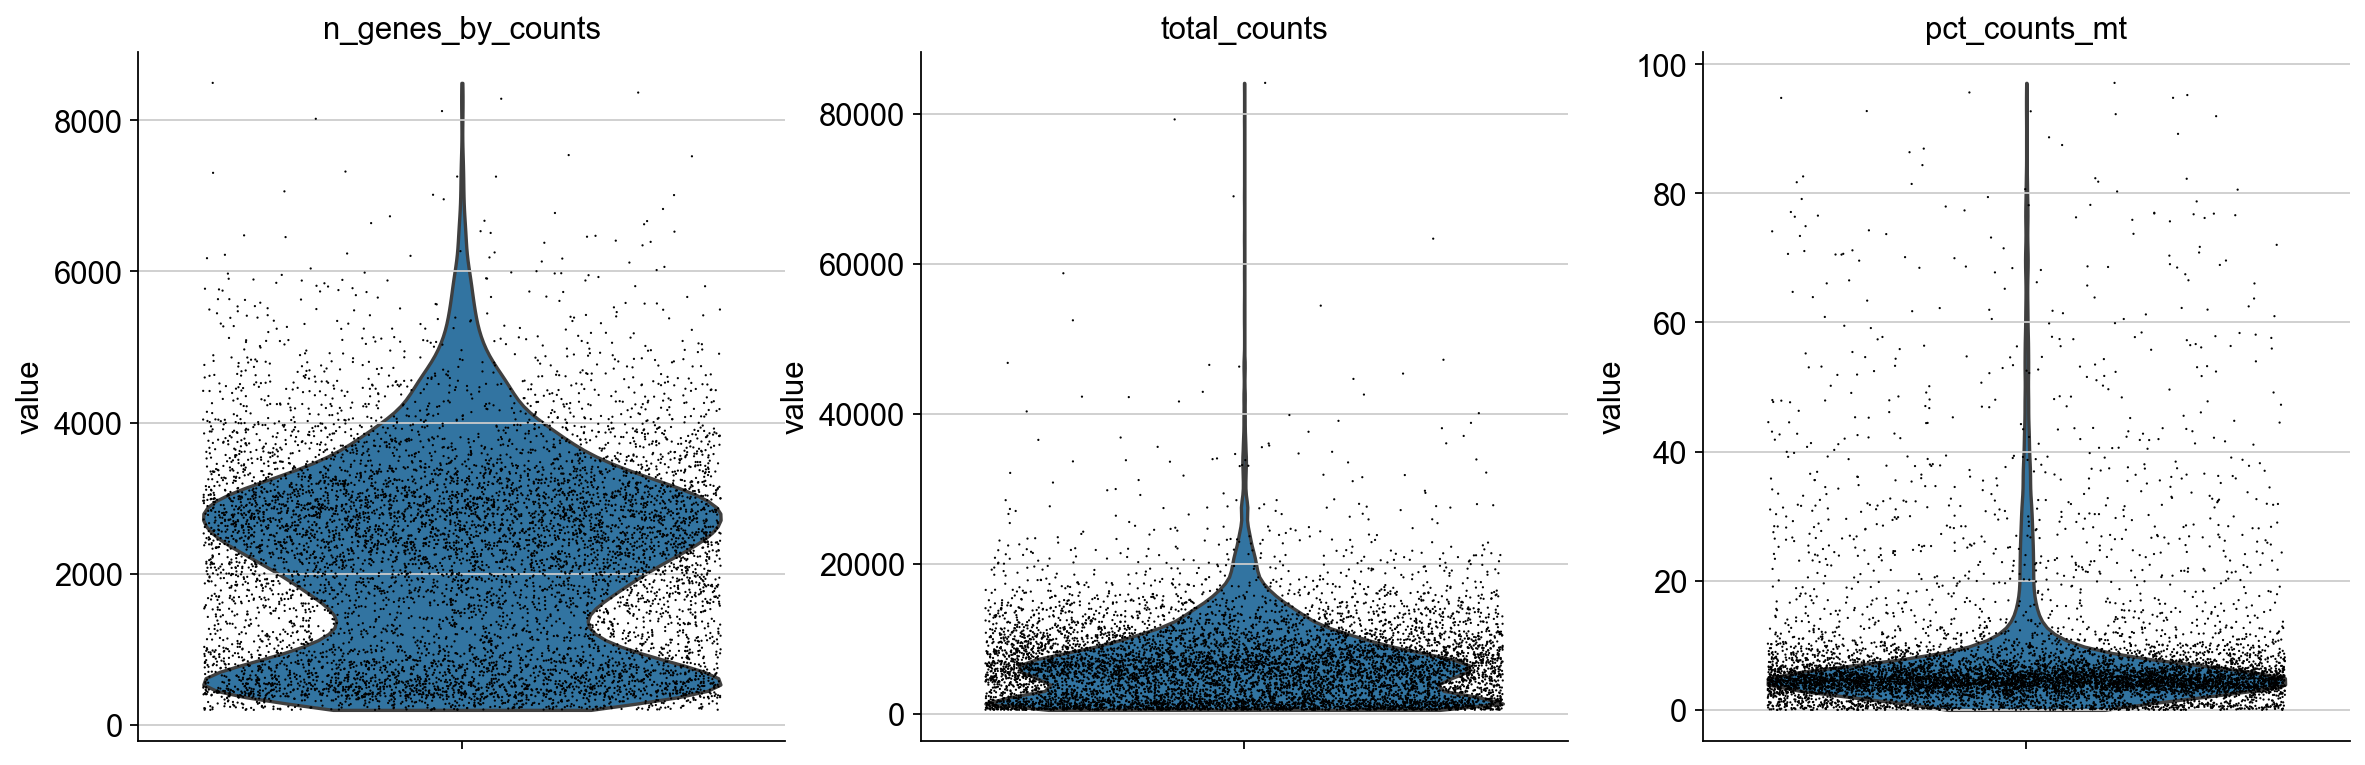

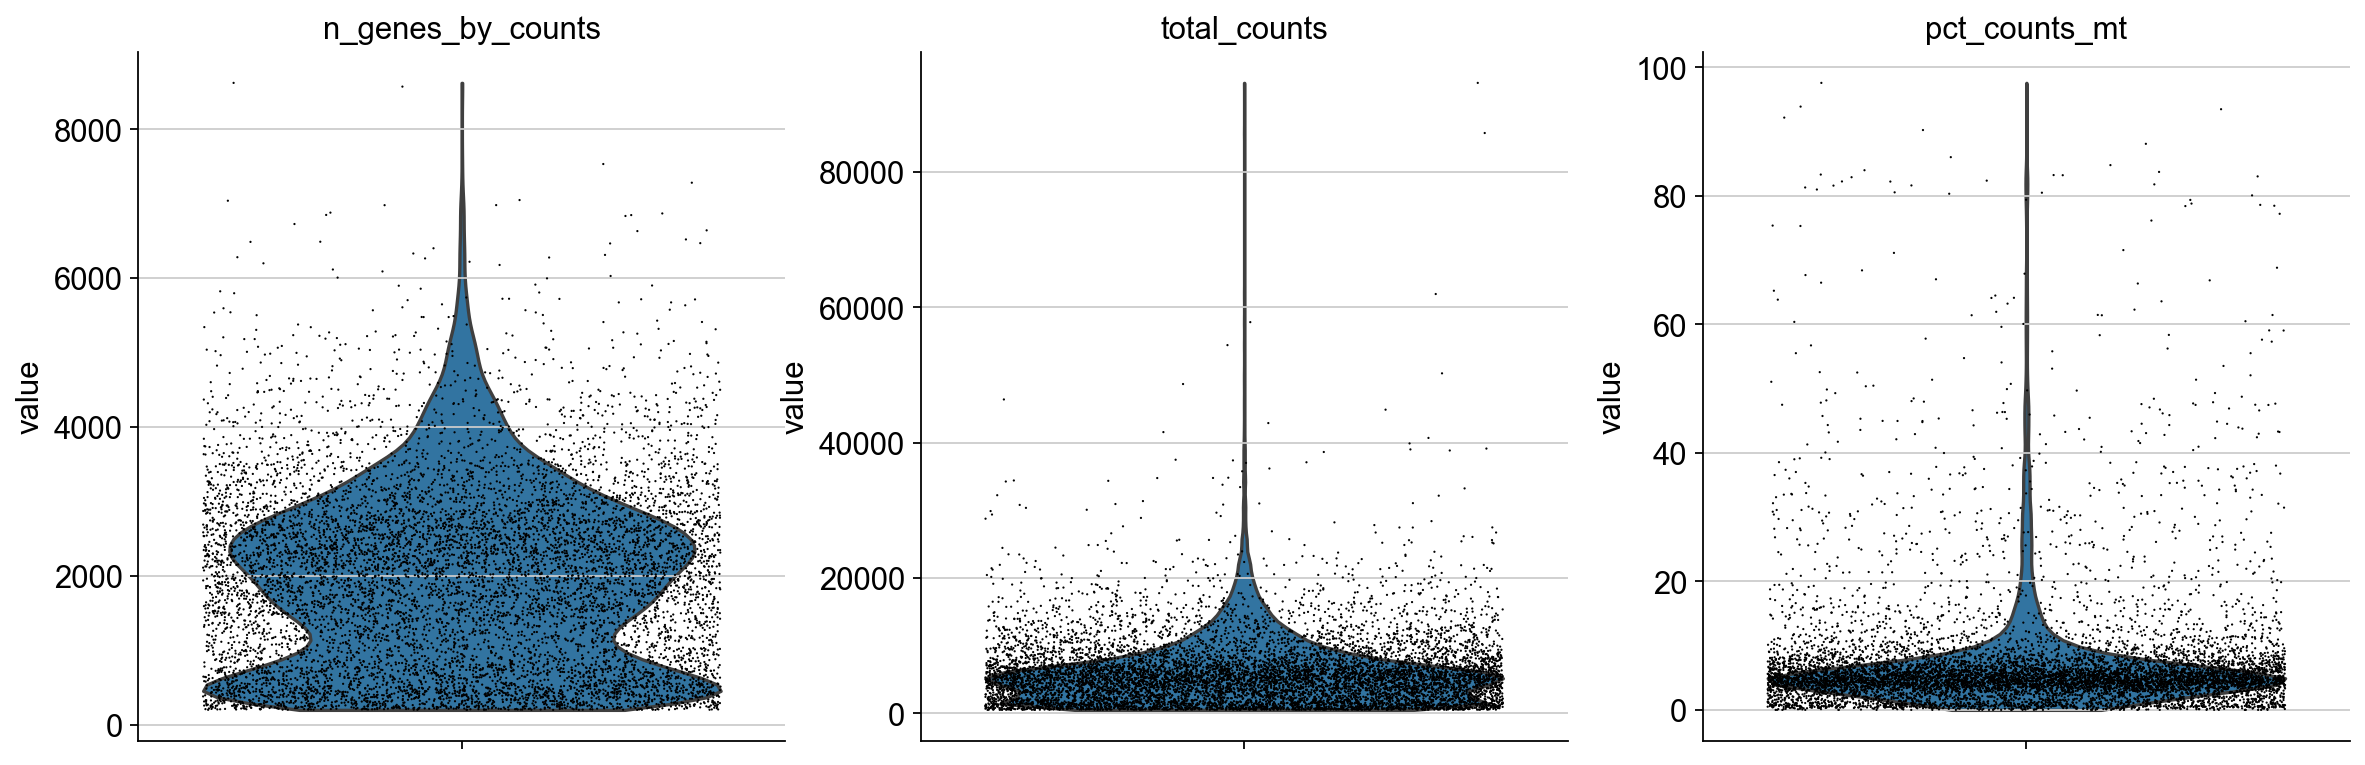

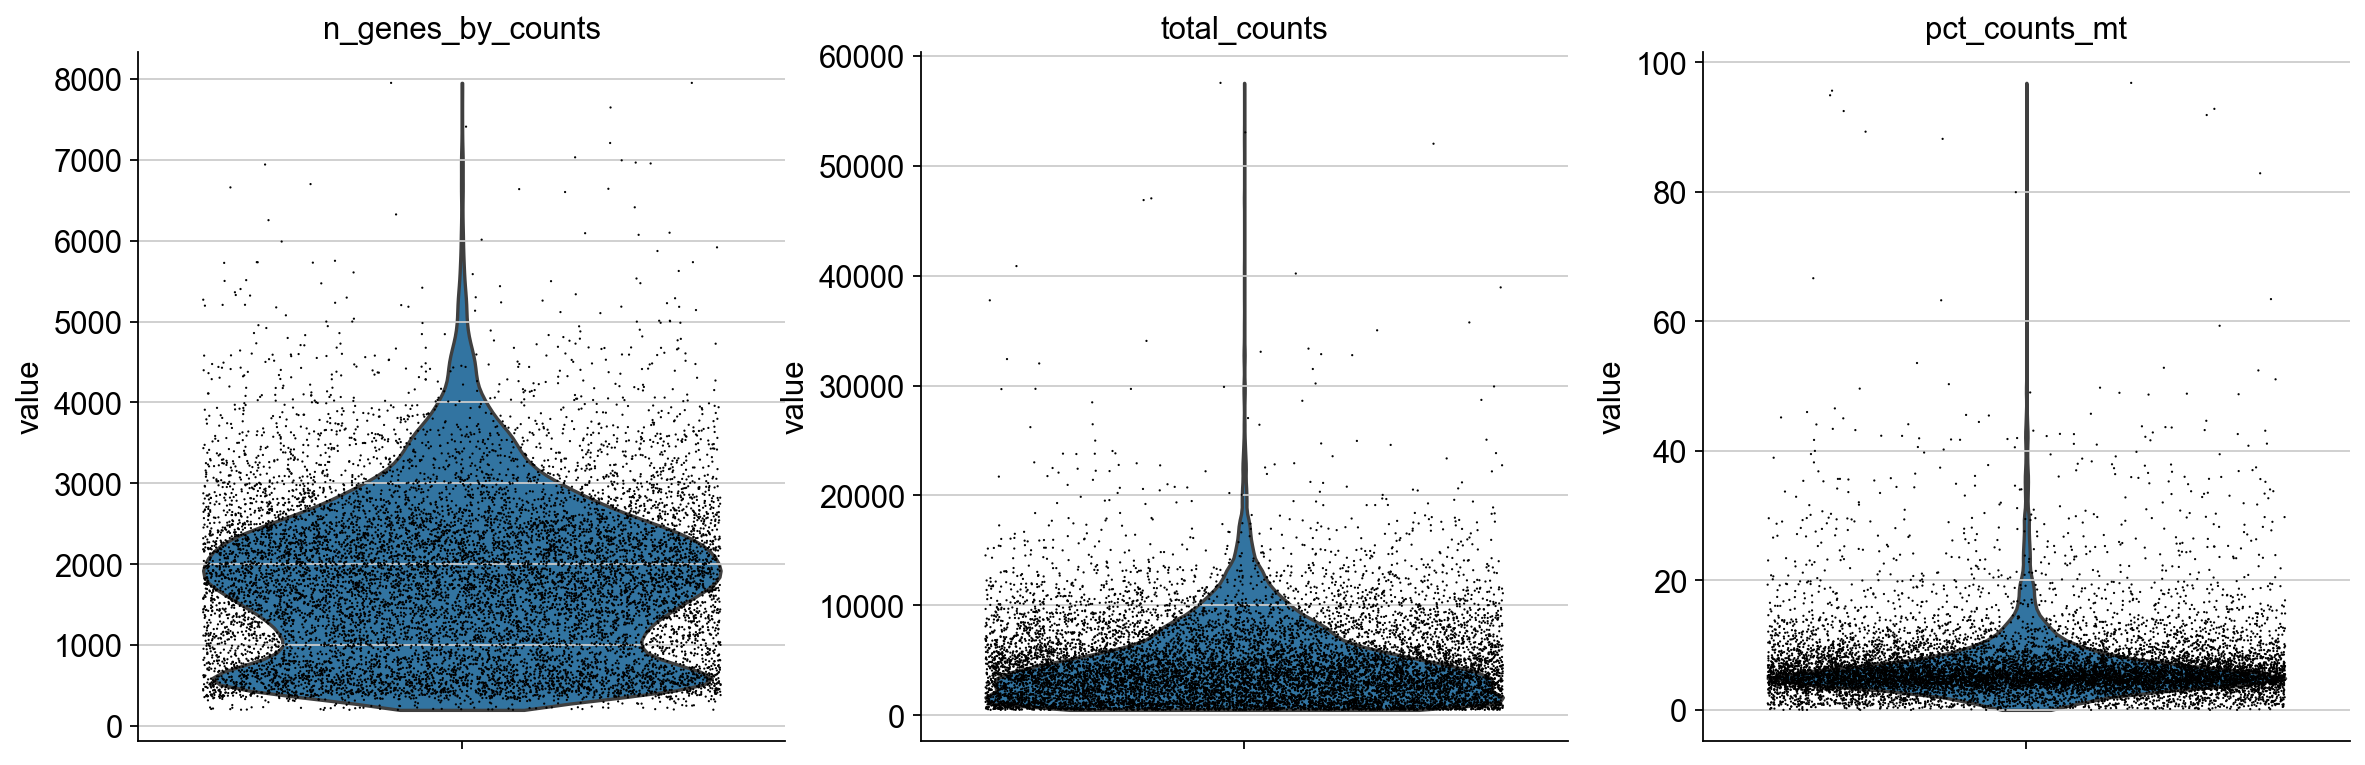

In [10]:
sc.pl.violin(S11,['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],jitter=0.4, multi_panel=True)
sc.pl.violin(S12,['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],jitter=0.4, multi_panel=True)
sc.pl.violin(S13,['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],jitter=0.4, multi_panel=True)
sc.pl.violin(S14,['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],jitter=0.4, multi_panel=True)

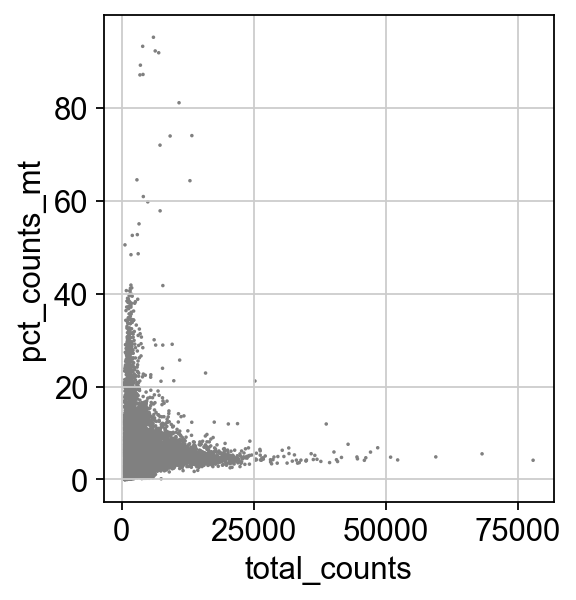

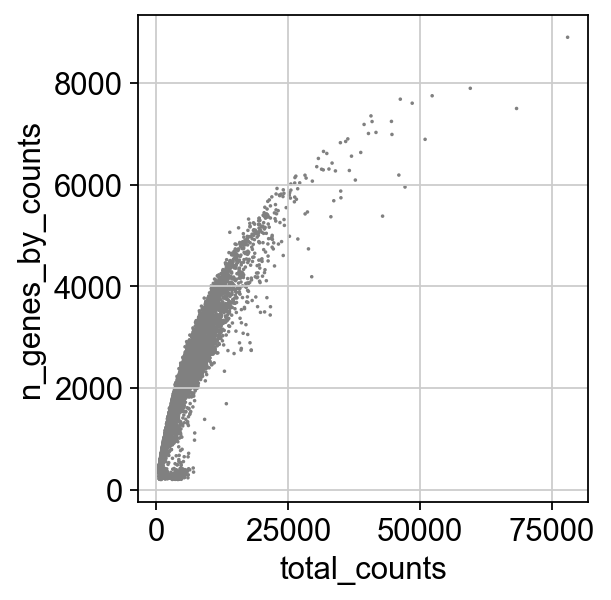

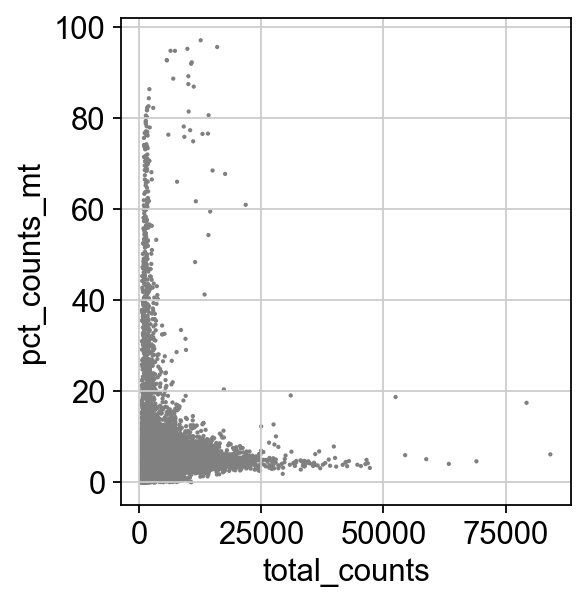

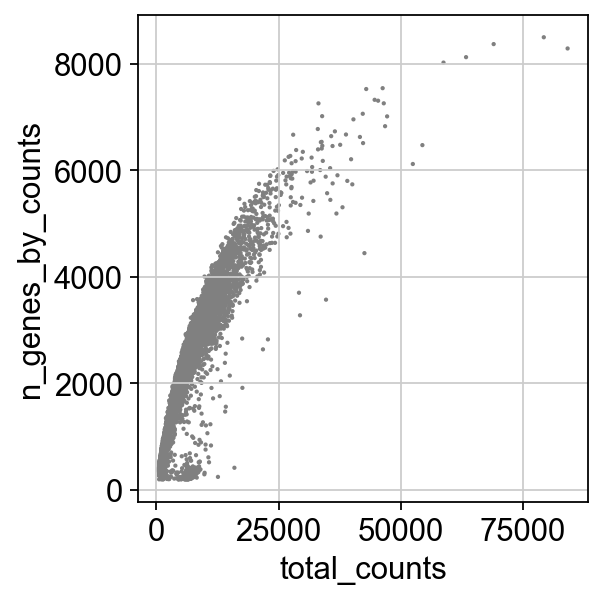

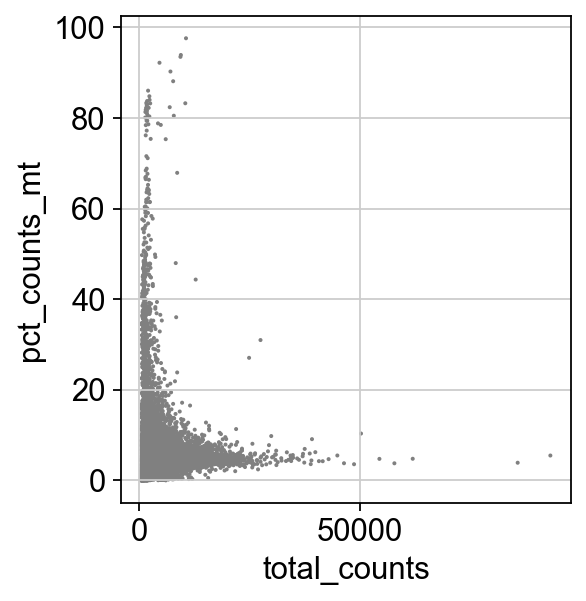

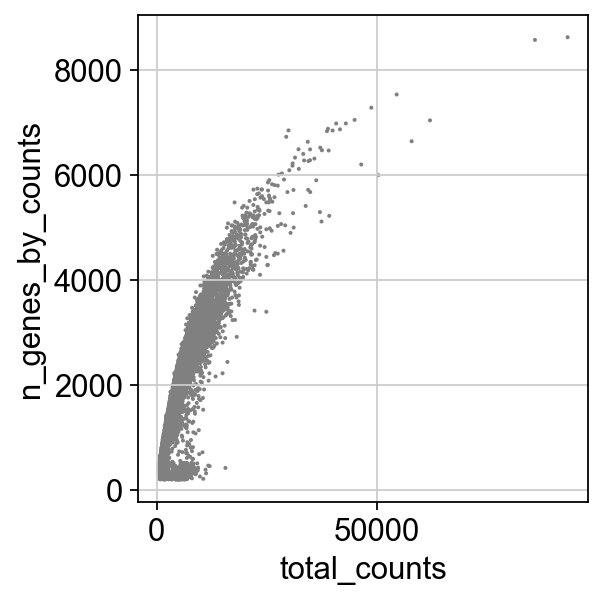

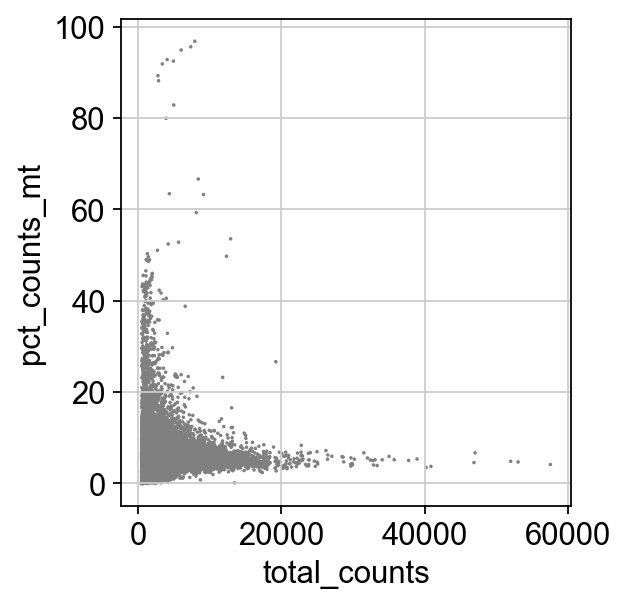

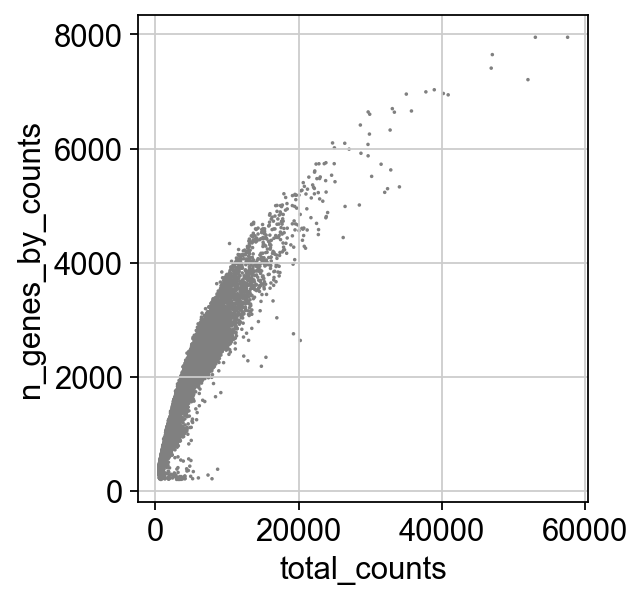

In [11]:
sc.pl.scatter(S11, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(S11, x='total_counts', y='n_genes_by_counts')

sc.pl.scatter(S12, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(S12, x='total_counts', y='n_genes_by_counts')

sc.pl.scatter(S13, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(S13, x='total_counts', y='n_genes_by_counts')

sc.pl.scatter(S14, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(S14, x='total_counts', y='n_genes_by_counts')

In [12]:
S11 = S11[S11.obs.n_genes_by_counts < 2500, :]
S11 = S11[S11.obs.pct_counts_mt < 3, :]

S12 = S12[S12.obs.n_genes_by_counts < 2500, :]
S12 = S12[S12.obs.pct_counts_mt < 3, :]

S13 = S13[S13.obs.n_genes_by_counts < 2500, :]
S13 = S13[S13.obs.pct_counts_mt < 3, :]

S14 = S14[S14.obs.n_genes_by_counts < 2500, :]
S14 = S14[S14.obs.pct_counts_mt < 3, :]

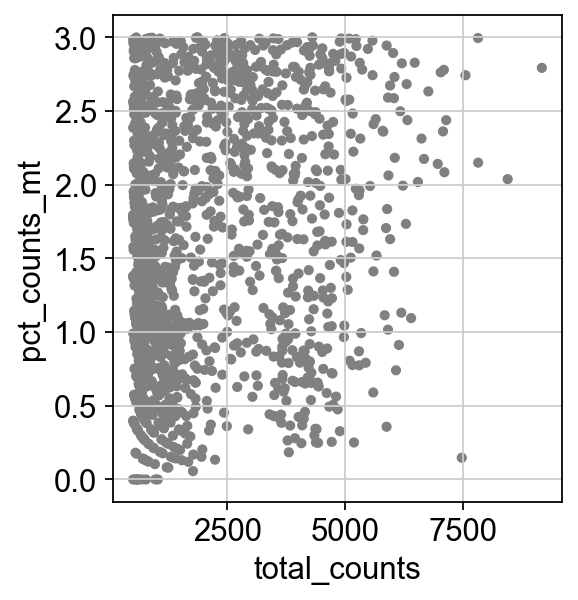

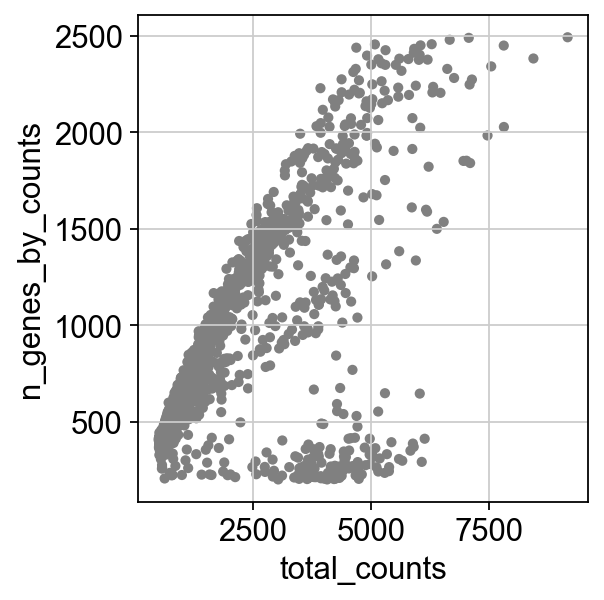

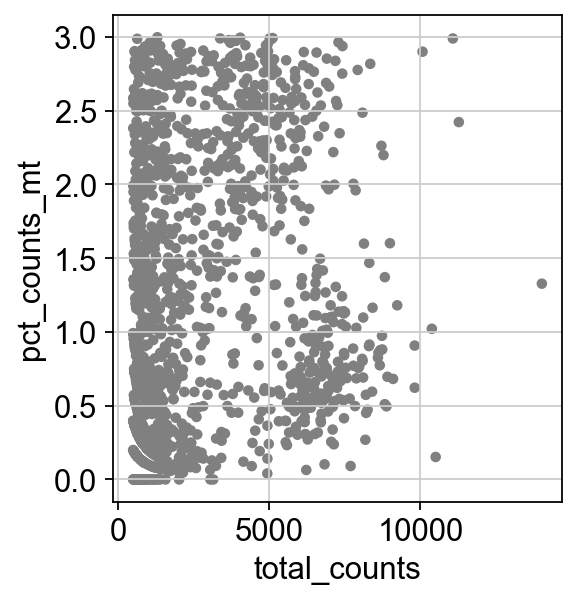

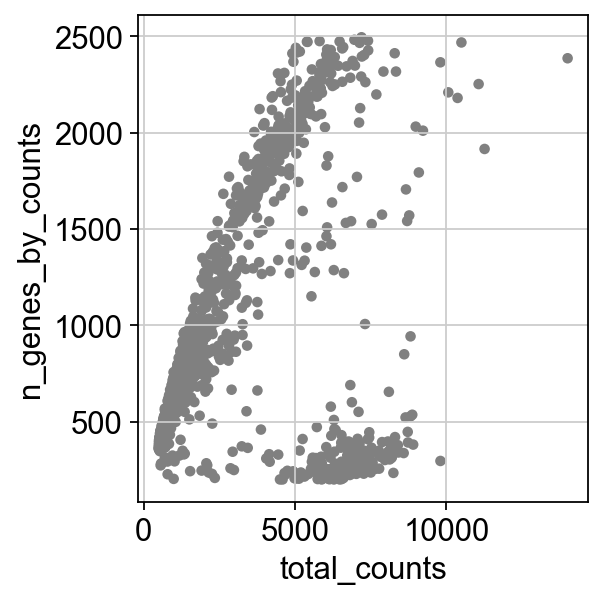

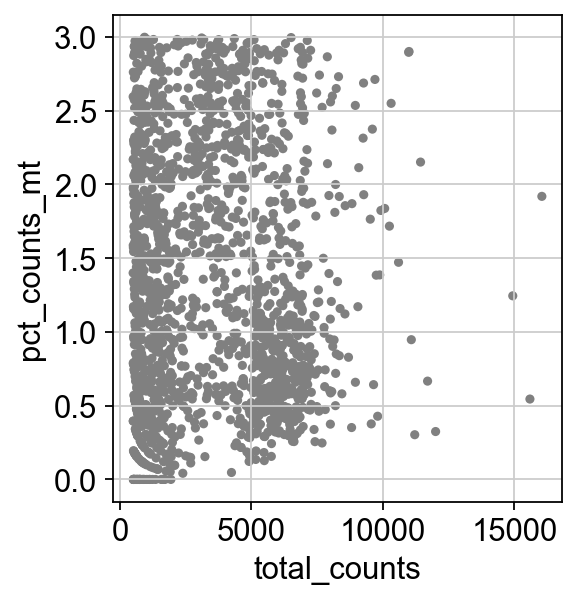

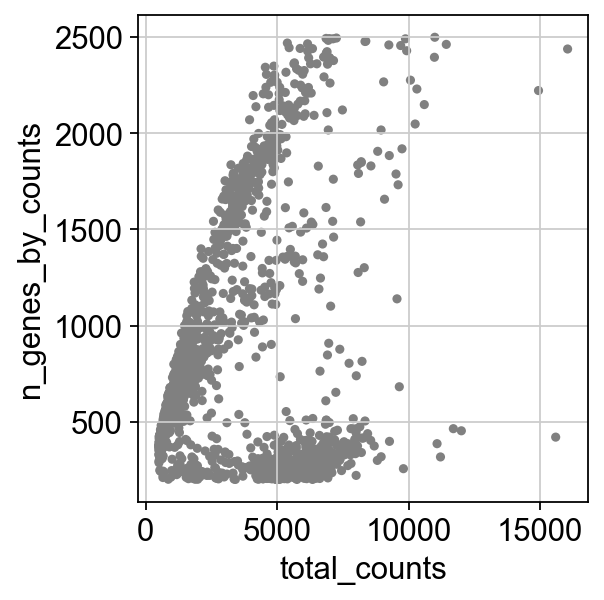

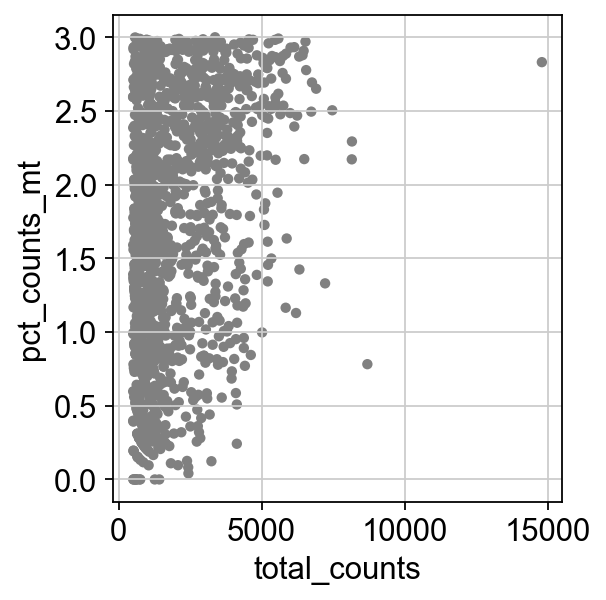

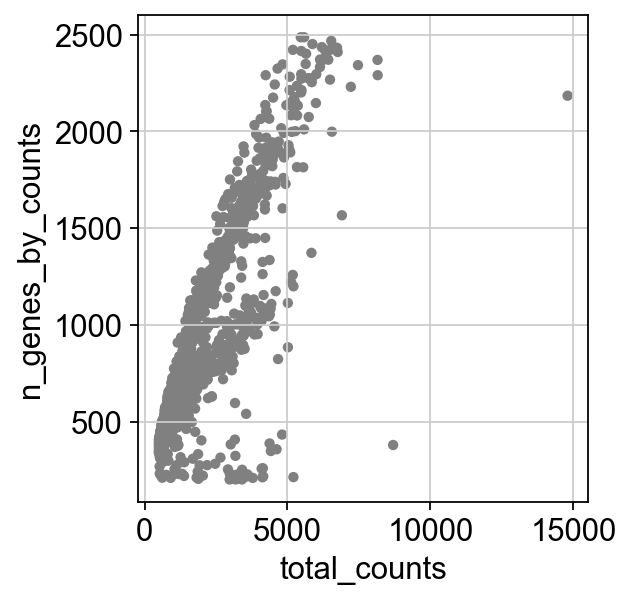

In [13]:
sc.pl.scatter(S11, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(S11, x='total_counts', y='n_genes_by_counts')

sc.pl.scatter(S12, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(S12, x='total_counts', y='n_genes_by_counts')

sc.pl.scatter(S13, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(S13, x='total_counts', y='n_genes_by_counts')

sc.pl.scatter(S14, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(S14, x='total_counts', y='n_genes_by_counts')

In [14]:
sc.pp.normalize_total(S11, target_sum=1e4)
sc.pp.normalize_total(S12, target_sum=1e4)
sc.pp.normalize_total(S13, target_sum=1e4)
sc.pp.normalize_total(S14, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)


In [15]:
sc.pp.log1p(S11)
sc.pp.log1p(S12)
sc.pp.log1p(S13)
sc.pp.log1p(S14)

In [16]:
sc.pp.highly_variable_genes(S11, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.highly_variable_genes(S12, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.highly_variable_genes(S13, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.highly_variable_genes(S14, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


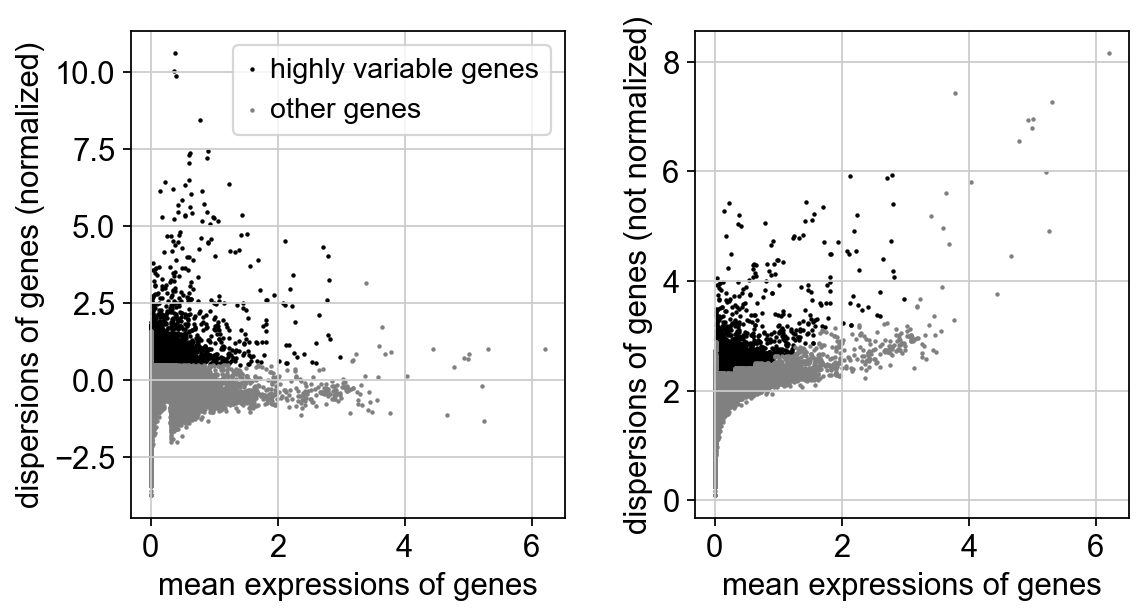

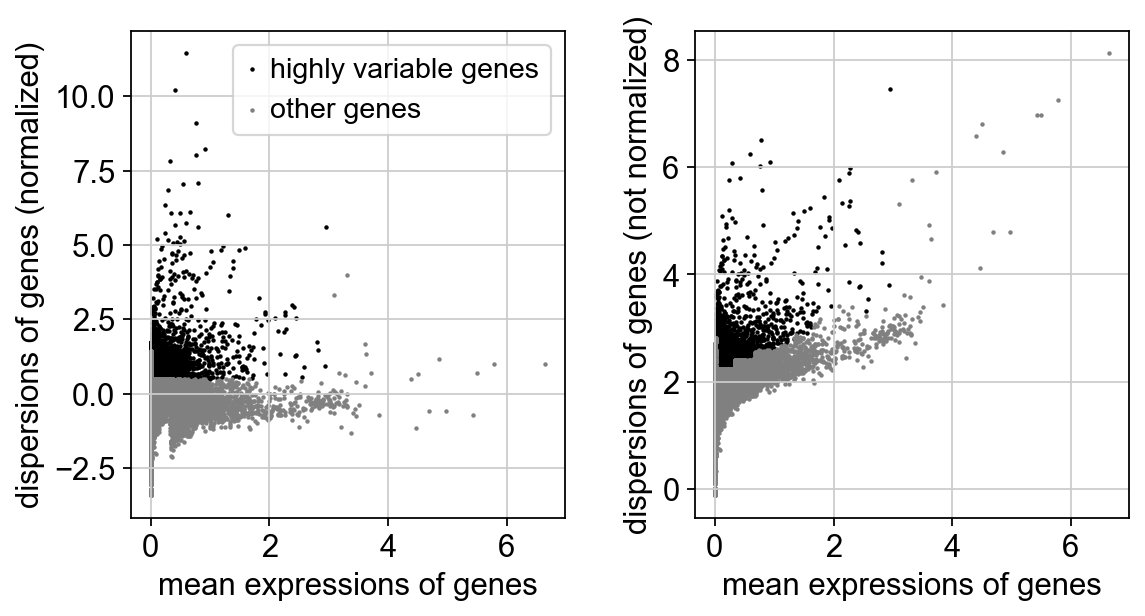

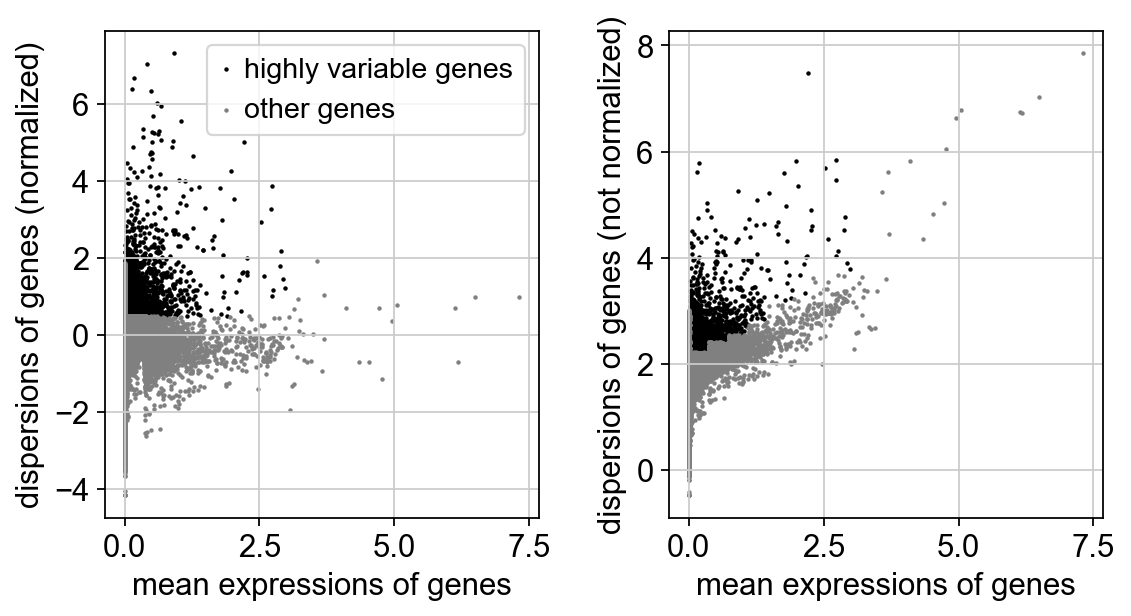

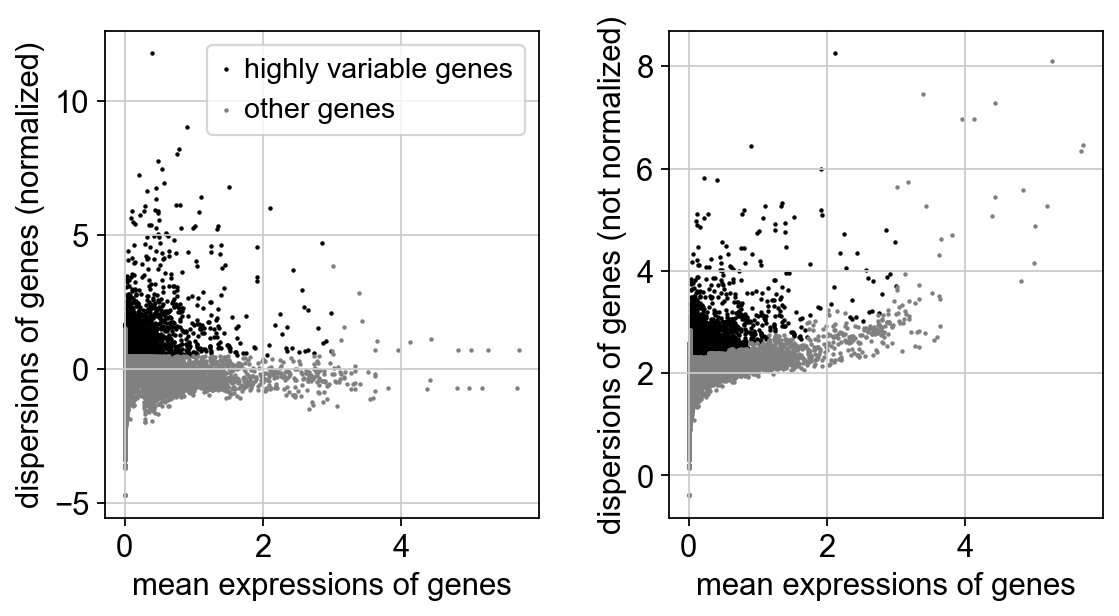

In [17]:
sc.pl.highly_variable_genes(S11)
sc.pl.highly_variable_genes(S12)
sc.pl.highly_variable_genes(S13)
sc.pl.highly_variable_genes(S14)

In [18]:
S11.raw = S11
S12.raw = S12
S13.raw = S13
S14.raw = S14

In [19]:
S11 = S11[:, S11.var.highly_variable]
S12 = S12[:, S12.var.highly_variable]
S13 = S13[:, S13.var.highly_variable]
S14 = S14[:, S14.var.highly_variable]

In [20]:
sc.pp.regress_out(S11,['total_counts', 'pct_counts_mt'])
sc.pp.regress_out(S12,['total_counts', 'pct_counts_mt'])
sc.pp.regress_out(S13,['total_counts', 'pct_counts_mt'])
sc.pp.regress_out(S14,['total_counts', 'pct_counts_mt'])


regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:20)
regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:23)
regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:20)
regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:24)


In [ ]:
sc.pp.scale(S11, max_value=10)
sc.pp.scale(S12, max_value=10)
sc.pp.scale(S13, max_value=10)
sc.pp.scale(S14, max_value=10)


In [ ]:
adata = S11.concatenate(S12,S13,S14)

In [ ]:
adata

In [ ]:
sc.tl.pca(adata, svd_solver='arpack')

In [ ]:
sc.pl.pca_variance_ratio(adata, log=True)

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [ ]:
sc.tl.umap(adata)

In [ ]:
sc.pl.umap(adata)

In [ ]:
sc.tl.leiden(adata, key_added = "leiden_1.0") # default resolution in 1.0
sc.tl.leiden(adata, resolution = 0.3, key_added = "leiden_0.3")
sc.tl.leiden(adata, resolution = 0.2, key_added = "leiden_0.2")
sc.tl.leiden(adata, resolution = 0.1, key_added = "leiden_0.1")
sc.tl.leiden(adata, resolution = 0.01, key_added = "leiden_0.01")

In [ ]:
adata.obsm['leiden_0.3'] = adata.obs['leiden_0.3']
adata.obsm['leiden_0.2'] = adata.obs['leiden_0.2']
adata.obsm['leiden_0.1'] = adata.obs['leiden_0.1']
adata.obsm['leiden_0.01'] = adata.obs['leiden_0.01']


In [ ]:
sc.pl.umap(adata, color=['leiden_0.3', 'leiden_0.2', 'leiden_0.1','leiden_1.0'])

In [ ]:
sc.pl.umap(adata[1:2153],color = "leiden_0.1")

In [ ]:
sc.pl.umap(adata[2154:3567],color = "leiden_0.1")

In [ ]:
sc.pl.umap(adata[3568:6330],color = "leiden_0.1")

In [ ]:
sc.pl.umap(adata[6331:11318],color = "leiden_0.1")

In [ ]:
sc.pl.umap(adata,color = "leiden_0.1")

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import gseapy
import matplotlib.pyplot as plt

sc.settings.verbosity = 2             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

In [ ]:
sc.settings.set_figure_params(dpi=80)

In [ ]:
print(adata.X.shape)
print(adata.raw.X.shape)
print(adata.raw.X[:10,:10])

In [ ]:
sc.tl.rank_genes_groups(adata,'leiden_0.1', method='t-test', key_added = "t-test")

In [ ]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "t-test")

In [ ]:
sc.tl.rank_genes_groups(adata,'leiden_0.1', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key="wilcoxon")

In [ ]:
sc.tl.rank_genes_groups(adata,'leiden_0.01', method='logreg',key_added = "logreg")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "logreg")

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden_0.1', method='t-test_overestim_var', key_added = "t-test_ov")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "t-test_ov")

In [ ]:
wc = sc.get.rank_genes_groups_df(adata, group='0', key='wilcoxon', pval_cutoff=0.01, log2fc_min=0)['names']
tt = sc.get.rank_genes_groups_df(adata, group='0', key='t-test', pval_cutoff=0.01, log2fc_min=0)['names']
tt_ov = sc.get.rank_genes_groups_df(adata, group='0', key='t-test_ov', pval_cutoff=0.01, log2fc_min=0)['names']

from matplotlib_venn import venn3
venn3([set(wc),set(tt),set(tt_ov)], ('Wilcox','T-test','T-test_ov') )
plt.show()

In [ ]:
sc.tl.dendrogram(adata,'leiden_0.1')

In [ ]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=5, key="wilcoxon", groupby="leiden_0.1", show_gene_labels=True)

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata,n_genes=5, key="wilcoxon", groupby="type")

In [ ]:
sc.pl.rank_genes_groups_stacked_violin(adata, n_genes=5, key="wilcoxon", groupby="type")

Matrix plot construction of DE genes based on Wilcoxon testing clustered based on Leiden clustering at 0.1 resolution.

In [ ]:
sc.pl.rank_genes_groups_matrixplot(adata, n_genes=5, key="wilcoxon", groupby="type")

In [ ]:
sc.tl.rank_genes_groups(adata,'leiden_0.1', groups=['1'],reference='2', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['1'], n_genes=20)

In [ ]:
sc.pl.rank_genes_groups_violin(adata,groups='1', n_genes=10)

In [ ]:
# plot the same genes as violins across all the datasets.

# convert numpy.recarray to list
mynames = [x[0] for x in adata.uns['rank_genes_groups']['names']]
sc.pl.stacked_violin(adata, mynames, groupby = 'leiden_0.01')

In [ ]:
sc.pl.rank_genes_groups_matrixplot(adata, n_genes=15, key="wilcoxon", groupby="type")

In [ ]:
sc.tl.rank_genes_groups(adata,'leiden_0.1',groups=['1'],reference='2', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['1'], n_genes=20)

In [ ]:
sc.pl.rank_genes_groups_violin(adata, groups='1', n_genes=10)

In [ ]:
# convert numpy.recarray to list
mynames = [x[0] for x in adata.uns['rank_genes_groups']['names'][:10]]
sc.pl.stacked_violin(adata, mynames, groupby = 'type')

In [ ]:
#cl1 = adata[adata.obs['leiden_0.1'] == '1',:]
adata.obs['type'].value_counts()

In [ ]:
sc.tl.rank_genes_groups(adata,'type',method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata,n_genes=25, sharey=False, key="wilcoxon")

In [ ]:
sc.pl.rank_genes_groups_violin(adata, n_genes=10, key="wilcoxon")

In [ ]:
adata.var

In [ ]:
adata.var.index.name = 'Gene_name'
adata.var.reset_index(inplace = True)

In [ ]:
adata

In [ ]:
adata.var

In [ ]:
adata.obs['gene_name'] = adata.var['Gene_name']

In [ ]:
adata.obs

In [ ]:
import scanpy as sc
genes1 = sc.get.rank_genes_groups_df(adata,group='S7',key='wilcoxon')['names']
genes2 = sc.get.rank_genes_groups_df(adata, group='S8', key='wilcoxon')['names']
genes3 = sc.get.rank_genes_groups_df(adata, group='S9', key='wilcoxon')['names']
genes4 = sc.get.rank_genes_groups_df(adata, group='S10', key='wilcoxon')['names']

In [ ]:
genes = genes1.tolist() +  genes2.tolist() + genes3.tolist() +  genes4.tolist()


In [ ]:
genes1 = sc.get.rank_genes_groups_df(adata,group='S7',key='wilcoxon')['names']

In [ ]:
#Available databases : ‘Human’, ‘Mouse’, ‘Yeast’, ‘Fly’, ‘Fish’, ‘Worm’ 
gene_set_names = gseapy.get_library_name(organism='Mouse')
print(gene_set_names)

In [ ]:
#?gseapy.enrichr
glist = sc.get.rank_genes_groups_df(adata, group='S7', key='wilcoxon', log2fc_min=0.25, pval_cutoff=0.01)['names'].squeeze().str.strip().tolist()
print(len(glist))

In [ ]:
#?gseapy.enrichr
glist = sc.get.rank_genes_groups_df(adata, group='S8', 
                                    key='wilcoxon', log2fc_min=0.25, 
                                    pval_cutoff=0.01)['names'].squeeze().str.strip().tolist()
print(len(glist))

In [ ]:
glist = sc.get.rank_genes_groups_df(adata, group='S9', 
                                    key='wilcoxon', log2fc_min=0.25, 
                                    pval_cutoff=0.01)['names'].squeeze().str.strip().tolist()
print(len(glist))

In [ ]:
glist = sc.get.rank_genes_groups_df(adata, group='S10', 
                                    key='wilcoxon', log2fc_min=0.25, 
                                    pval_cutoff=0.01)['names'].squeeze().str.strip().tolist()
print(len(glist))

In [ ]:
enr_res = gseapy.enrichr(gene_list=glist,
                     organism='Mouse',
                     gene_sets='GO_Biological_Process_2021',
                     description='pathway',
                     cutoff = 0.5)

In [ ]:
enr_res.results

In [ ]:
enr_res.results.to_csv('GO_Biological_Process_2021_enriched.csv')

In [ ]:
gseapy.barplot(enr_res.res2d,title='GO_Biological_Process_2021')

In [ ]:
gene_rank = sc.get.rank_genes_groups_df(adata,group='S7', key='wilcoxon')[['names','logfoldchanges']]
gene_rank.sort_values(by=['logfoldchanges'], inplace=True, ascending=False)

In [ ]:
# calculate_qc_metrics will calculate number of cells per gene
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

# filter for genes expressed in at least 30 cells.
#gene_rank = gene_rank[gene_rank['names']]

In [ ]:
adata

In [ ]:
#Available databases : ‘Human’, ‘Mouse’, ‘Yeast’, ‘Fly’, ‘Fish’, ‘Worm’ 
gene_set_names = gseapy.get_library_name(organism='Mouse')
print(gene_set_names)

In [ ]:
res = gseapy.prerank(rnk=gene_rank,gene_sets='WikiPathways_2019_Mouse')

In [ ]:
gene_rank

In [ ]:
#jaspar 

#https://github.com/asntech/pyjaspar

In [ ]:
#GO:0038061 - NF-Kappa Beta signalling pathway


In [ ]:
sc.tl.rank_genes_groups(adata,'type',groups=['S8','S9','S10'],reference='S7', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['S8','S9','S10'], n_genes=20)

In [ ]:
sc.pl.rank_genes_groups_violin(adata,groups=['S8','S9','S10'], n_genes=10)

In [ ]:
sc.pl.highest_expr_genes(adata,n_top=5000, )


In [ ]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo', 'pct_counts_hb'],
             jitter=0.4, groupby = 'sample', rotation= 45)

In [ ]:
adata